In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from datetime import datetime, timedelta

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../data/energy_task.csv')
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,11-01-2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,18.2000,48.900000,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3
1,11-01-2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,18.2000,48.863333,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2
2,11-01-2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,18.2000,48.730000,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1
3,11-01-2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,18.1000,48.590000,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0
4,11-01-2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,18.1000,48.590000,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,27-05-2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,24.7000,50.074000,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3
19731,27-05-2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,24.7000,49.790000,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3
19732,27-05-2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,24.7000,49.660000,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3
19733,27-05-2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,24.6625,49.518750,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19626 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19569 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19654 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19644 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19651 non-null  float64
 15  T7           19681 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19613 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint'],
      dtype='object')

Переименуем часть столбцов

In [6]:
df = df.rename (
    columns = {
        'Appliances' : 'appliances',
        'Press_mm_hg' : 'press_mm_hg',
        'Windspeed' : 'windspeed',
        'Visibility' : 'visibility',
        'Tdewpoint' : 'tdewpoint'
    }
)

In [7]:
df.columns

Index(['date', 'appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'press_mm_hg', 'RH_out', 'windspeed',
       'visibility', 'tdewpoint'],
      dtype='object')

### Обработка пропущенных знаечний

In [8]:
df.isna().sum()

date           109
appliances       0
lights           0
T1               0
RH_1             0
T2               0
RH_2           166
T3               0
RH_3             0
T4               0
RH_4            81
T5               0
RH_5            91
T6               0
RH_6            84
T7              54
RH_7             0
T8             122
RH_8             0
T9              84
RH_9             3
T_out          196
press_mm_hg    128
RH_out         101
windspeed        0
visibility      10
tdewpoint        0
dtype: int64

Начнём работу со столбца 'date'. Так как у нас в датасете даны данные с промежутками в 10 минут, то для заполнения элементов данного столбца нам необходимо взять предыдущий элемент столбца и добавить к нему 10 минут.

Для начала приведём столбец к необходимому формату для дальнейшего удобства

In [9]:
df['date'] = pd.to_datetime(df['date'],format = '%d-%m-%Y %H:%M')
df['date']

0       2016-01-11 17:00:00
1       2016-01-11 17:10:00
2       2016-01-11 17:20:00
3       2016-01-11 17:30:00
4       2016-01-11 17:40:00
                ...        
19730   2016-05-27 17:20:00
19731   2016-05-27 17:30:00
19732   2016-05-27 17:40:00
19733   2016-05-27 17:50:00
19734   2016-05-27 18:00:00
Name: date, Length: 19735, dtype: datetime64[ns]

Теперь заполним пропуски

In [10]:
index = df['date'].index[df['date'].apply(np.isnan)]
df['date'] = df['date'].replace('',np.nan).ffill()
index
df.loc[index,'date'] = df.loc[index,'date'] + timedelta(minutes=10)

In [11]:
df['date'].unique()

<DatetimeArray>
['2016-01-11 17:00:00', '2016-01-11 17:10:00', '2016-01-11 17:20:00',
 '2016-01-11 17:30:00', '2016-01-11 17:40:00', '2016-01-11 17:50:00',
 '2016-01-11 18:00:00', '2016-01-11 18:10:00', '2016-01-11 18:20:00',
 '2016-01-11 18:30:00',
 ...
 '2016-05-27 16:30:00', '2016-05-27 16:40:00', '2016-05-27 16:50:00',
 '2016-05-27 17:00:00', '2016-05-27 17:10:00', '2016-05-27 17:20:00',
 '2016-05-27 17:30:00', '2016-05-27 17:40:00', '2016-05-27 17:50:00',
 '2016-05-27 18:00:00']
Length: 19735, dtype: datetime64[ns]

In [12]:
df.isna().sum()

date             0
appliances       0
lights           0
T1               0
RH_1             0
T2               0
RH_2           166
T3               0
RH_3             0
T4               0
RH_4            81
T5               0
RH_5            91
T6               0
RH_6            84
T7              54
RH_7             0
T8             122
RH_8             0
T9              84
RH_9             3
T_out          196
press_mm_hg    128
RH_out         101
windspeed        0
visibility      10
tdewpoint        0
dtype: int64

Остальные значения заменим предыдущими, потому что они обозначают характеристики(температура, влажность, давление, скорость ветра и видимость), которые слабо изменяются за 10 минут

In [13]:
columns_to_replace =['RH_2', 'RH_4',
       'RH_5', 'RH_6',
       'T7', 'T8', 'T9', 'RH_9',
       'T_out', 'press_mm_hg', 'RH_out',
       'visibility']

for row in columns_to_replace:
    df[row] = df[row].replace('',np.nan).ffill()

In [14]:
df.isna().sum()

date           0
appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
press_mm_hg    0
RH_out         0
windspeed      0
visibility     0
tdewpoint      0
dtype: int64

Коррекция типов данных и обогащение данному датасету не требуются

### Удаление дубликатов

In [15]:
df.duplicated().sum()

0

Дубликатов нет

Дублей в датах точно нет, это было проверено выше. Все остальные значения - числовые, а значит и там дублей быть не может

##  Исследование основных параметров(проверка на выбросы)

In [16]:
df.describe()[['appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'press_mm_hg', 'RH_out', 'windspeed',
       'visibility', 'tdewpoint']]

,appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,press_mm_hg,RH_out,windspeed,visibility,tdewpoint
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420277,22.267611,39.242500,20.855335,39.026888,...,22.029082,42.936165,19.485829,41.552372,7.412433,755.522624,79.750262,4.039752,38.331036,3.760995
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,16.362222,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,20.790000,39.066667,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,22.100000,42.375000,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,23.390000,46.536000,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069880,2.006111,3.254576,2.042884,4.341256,...,1.956187,5.224361,2.014734,4.151527,5.318496,7.399399,14.901495,2.451221,11.794255,4.195248


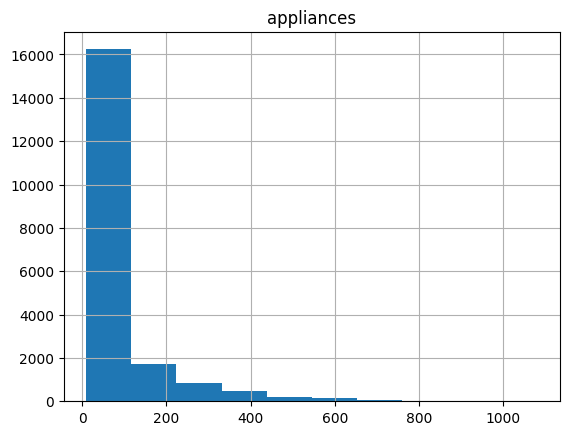

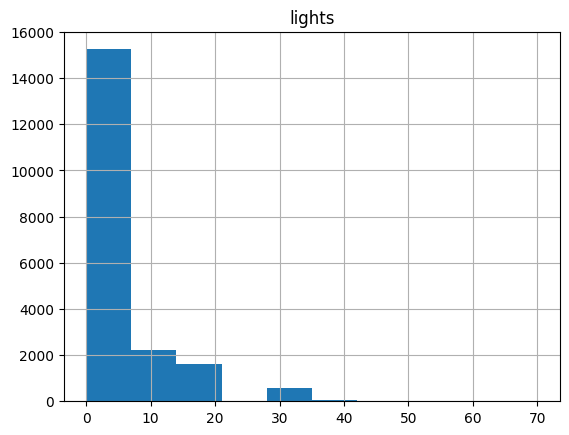

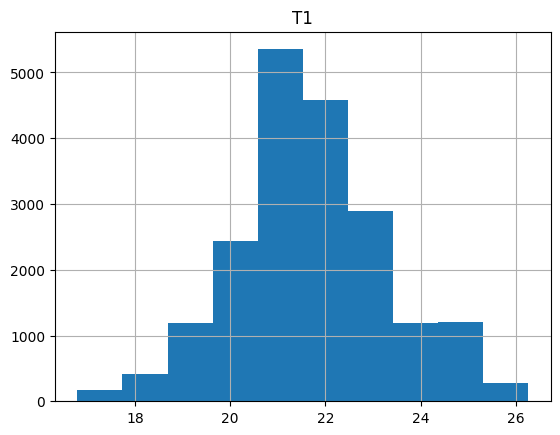

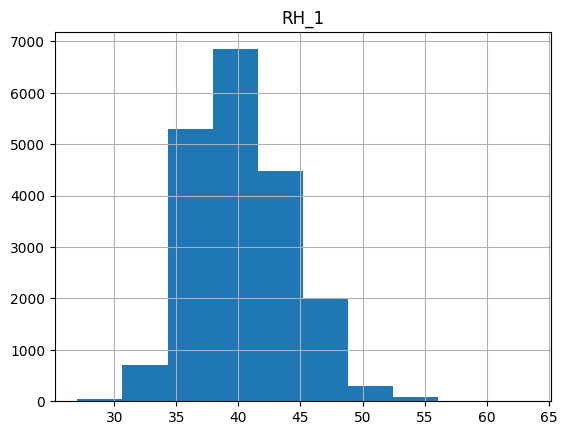

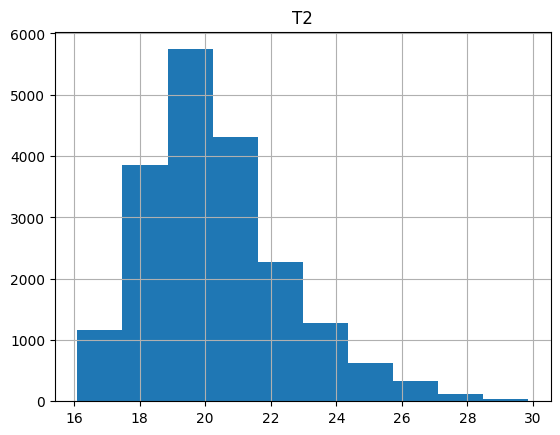

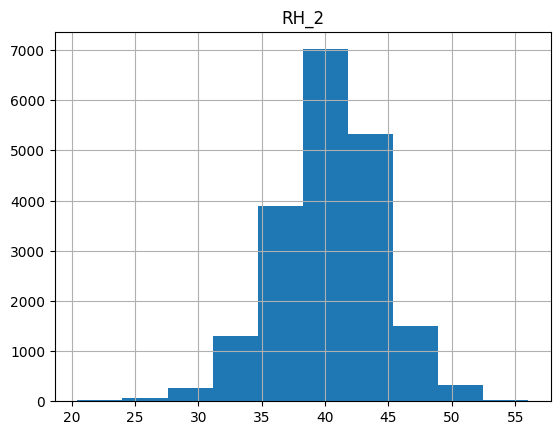

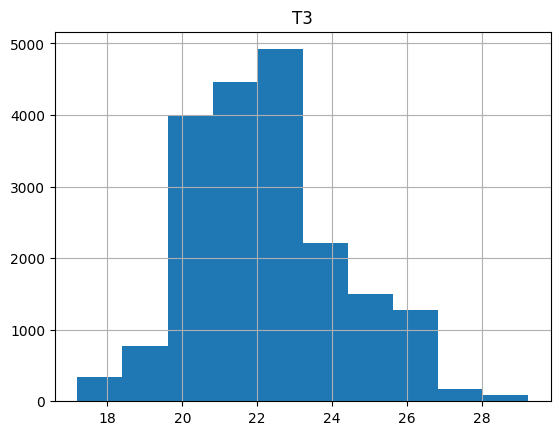

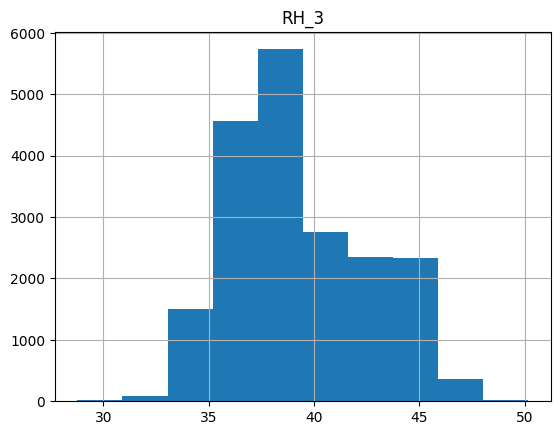

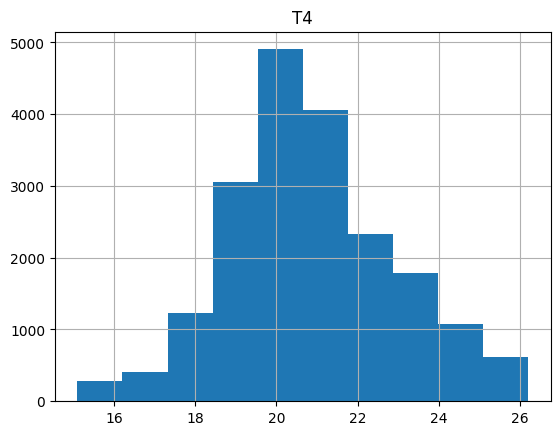

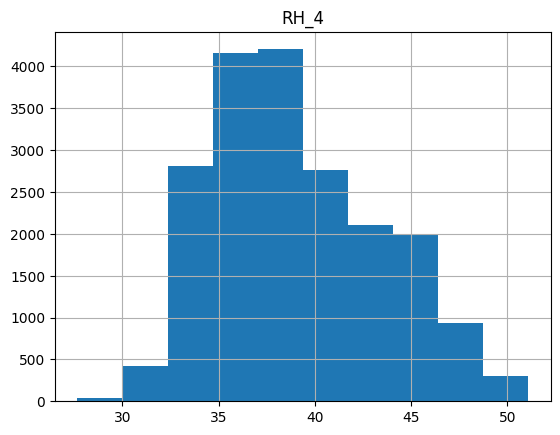

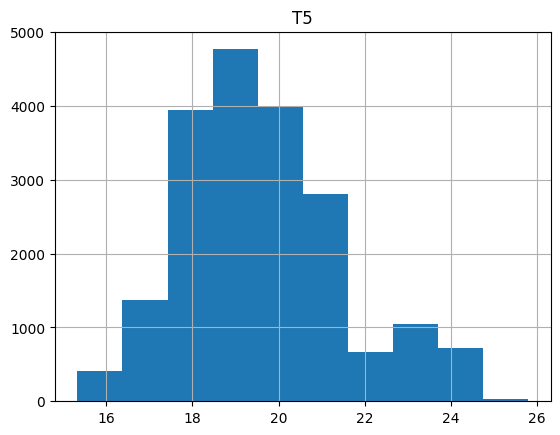

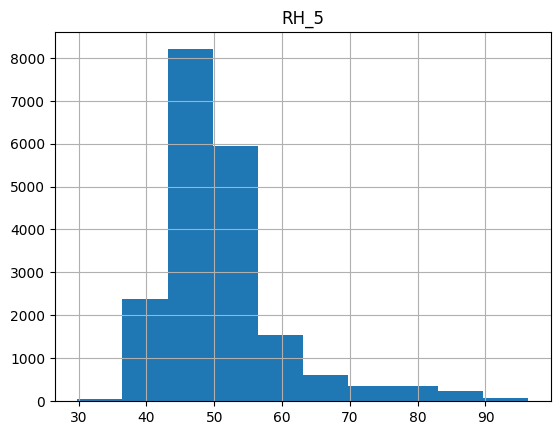

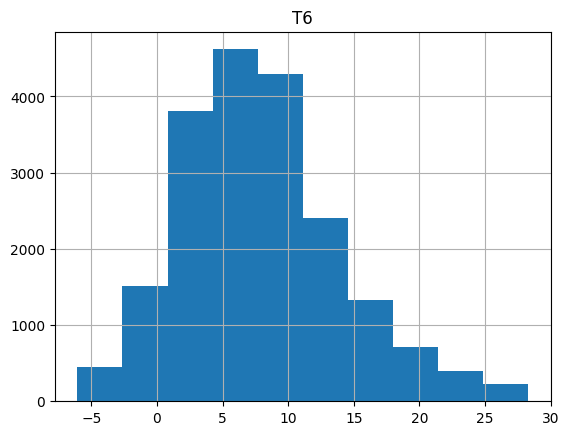

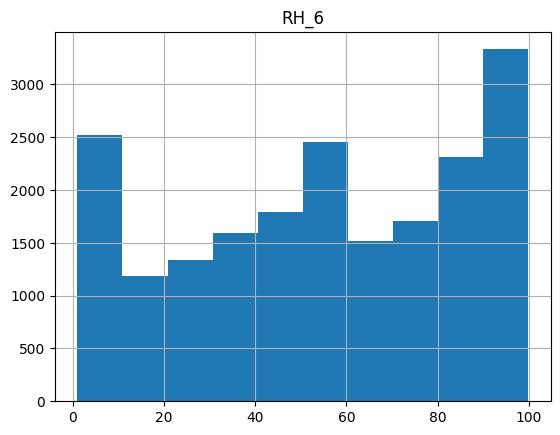

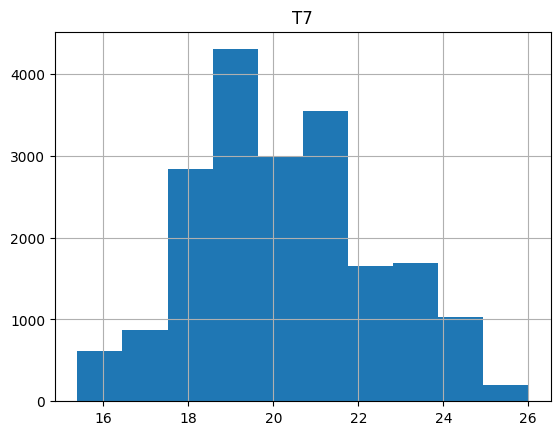

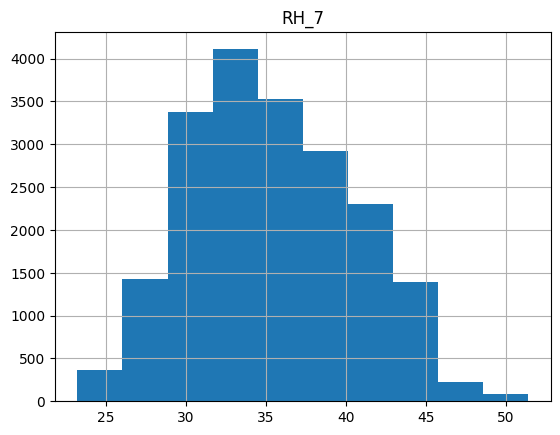

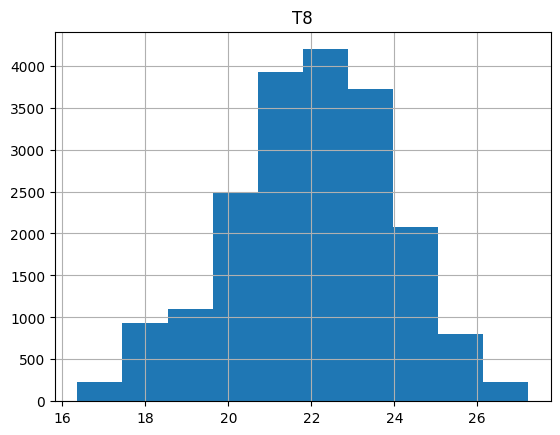

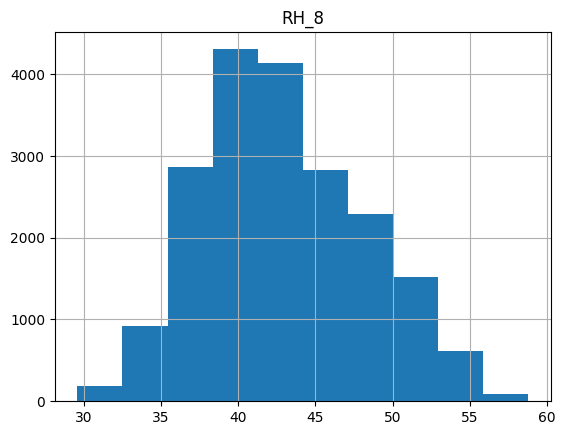

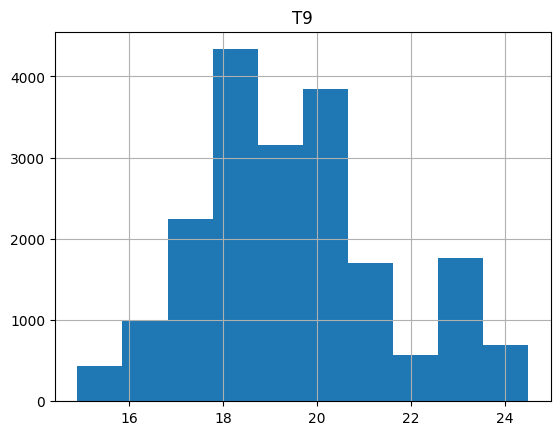

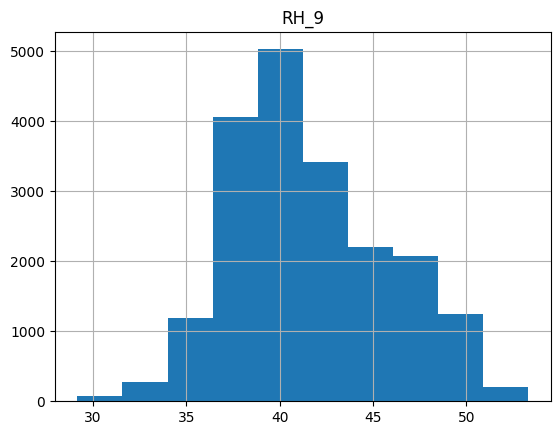

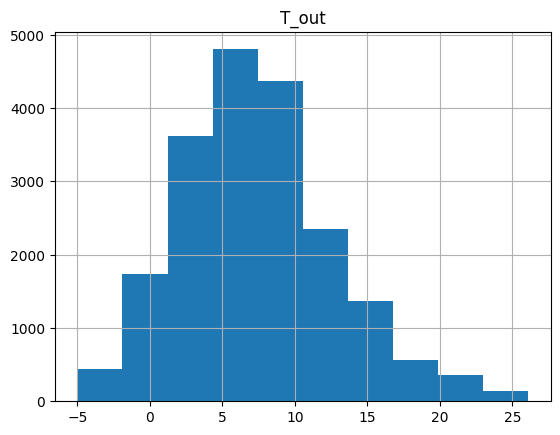

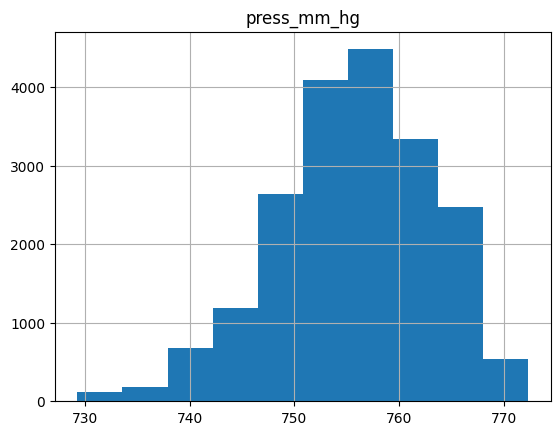

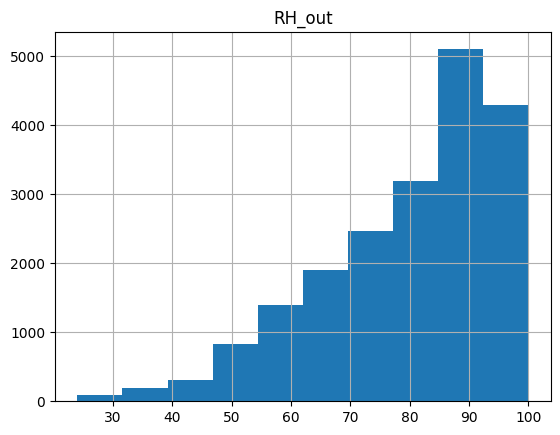

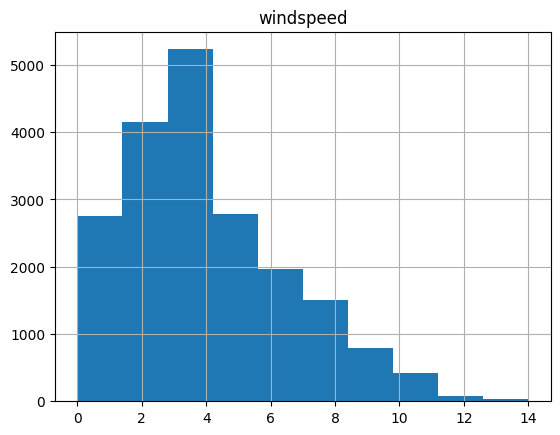

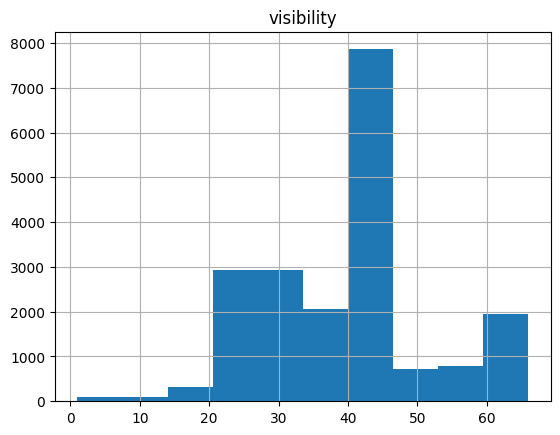

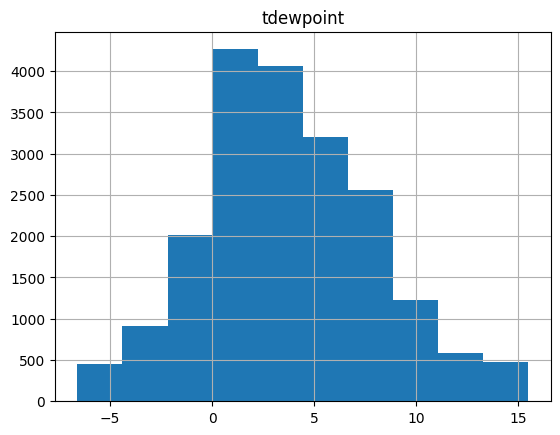

In [17]:
columns = ['appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'press_mm_hg', 'RH_out', 'windspeed',
       'visibility', 'tdewpoint']

for column in columns:
    df.hist(column)

In [18]:
outlier = df[["appliances"]]
outlier

,appliances
0,60
1,60
2,50
3,50
4,60
...,...
19730,100
19731,90
19732,270
19733,420


In [19]:
Q1 = outlier.quantile(0.25)
Q1

appliances    50.0
Name: 0.25, dtype: float64

In [20]:
Q3 = outlier.quantile(0.75)
Q3

appliances    100.0
Name: 0.75, dtype: float64

In [21]:
# IQR-оценки
IQR = Q3-Q1
# Отфильтрованные данные, из которых удалены выбросы
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,appliances
0,60
1,60
2,50
3,50
4,60
...,...
19727,120
19728,110
19729,90
19730,100


In [22]:
data_filtered.describe()['appliances']

count    17597.000000
mean        67.209752
std         28.480499
min         10.000000
25%         50.000000
50%         60.000000
75%         80.000000
max        170.000000
Name: appliances, dtype: float64

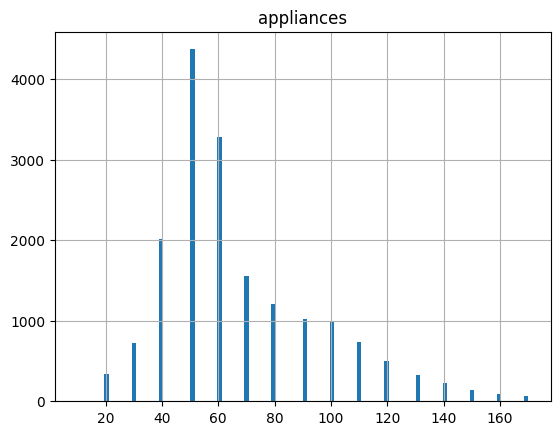

In [23]:
# создать гистограмму с отфильтрованным выбросом
filtered_outlier = data_filtered[['appliances']]

for col in filtered_outlier:
    data_filtered.hist(col, bins=100)

In [24]:
index_list = list(data_filtered.index.values)

In [25]:
df = df[df.index.isin(index_list)]
df

,date,appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T8,RH_8,T9,RH_9,T_out,press_mm_hg,RH_out,windspeed,visibility,tdewpoint
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,18.200000,48.900000,17.033333,45.530000,6.60,733.50,92.000000,7.000000,63.000000,5.3
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,18.200000,48.863333,17.066667,45.560000,6.48,733.60,92.000000,6.666667,59.166667,5.2
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,18.200000,48.730000,17.000000,45.500000,6.37,733.70,92.000000,6.333333,55.333333,5.1
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,18.100000,48.590000,17.000000,45.400000,6.25,733.80,92.000000,6.000000,51.500000,5.0
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,18.100000,48.590000,17.000000,45.400000,6.13,733.90,92.000000,5.666667,47.666667,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19727,2016-05-27 16:50:00,120,0,25.500000,47.456667,26.000000,42.320000,27.663333,40.693333,24.700000,...,24.540000,51.500000,23.200000,46.718000,23.00,755.25,55.000000,2.833333,22.166667,13.4
19728,2016-05-27 17:00:00,110,0,25.600000,47.193333,25.968571,42.528571,27.390000,41.030000,24.700000,...,24.600000,50.863333,23.200000,46.751429,23.00,755.20,55.000000,3.000000,22.000000,13.4
19729,2016-05-27 17:10:00,90,0,25.533333,46.860000,25.978000,42.534000,27.323333,41.090000,24.700000,...,24.666667,50.445000,23.200000,46.745000,22.90,755.20,55.333333,3.166667,22.833333,13.4
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,24.700000,50.074000,23.200000,46.790000,22.70,755.20,55.666667,3.333333,23.666667,13.3


### Выделение целевого признака и предикторов

In [26]:
y = df["appliances"]
X = df.drop(["appliances"], axis=1)

In [27]:
y

0         60
1         60
2         50
3         50
4         60
        ... 
19727    120
19728    110
19729     90
19730    100
19731     90
Name: appliances, Length: 17597, dtype: int64

In [28]:
X

,date,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,press_mm_hg,RH_out,windspeed,visibility,tdewpoint
0,2016-01-11 17:00:00,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,18.200000,48.900000,17.033333,45.530000,6.60,733.50,92.000000,7.000000,63.000000,5.3
1,2016-01-11 17:10:00,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,18.200000,48.863333,17.066667,45.560000,6.48,733.60,92.000000,6.666667,59.166667,5.2
2,2016-01-11 17:20:00,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,18.200000,48.730000,17.000000,45.500000,6.37,733.70,92.000000,6.333333,55.333333,5.1
3,2016-01-11 17:30:00,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,18.100000,48.590000,17.000000,45.400000,6.25,733.80,92.000000,6.000000,51.500000,5.0
4,2016-01-11 17:40:00,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,18.100000,48.590000,17.000000,45.400000,6.13,733.90,92.000000,5.666667,47.666667,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19727,2016-05-27 16:50:00,0,25.500000,47.456667,26.000000,42.320000,27.663333,40.693333,24.700000,45.560000,...,24.540000,51.500000,23.200000,46.718000,23.00,755.25,55.000000,2.833333,22.166667,13.4
19728,2016-05-27 17:00:00,0,25.600000,47.193333,25.968571,42.528571,27.390000,41.030000,24.700000,45.626667,...,24.600000,50.863333,23.200000,46.751429,23.00,755.20,55.000000,3.000000,22.000000,13.4
19729,2016-05-27 17:10:00,0,25.533333,46.860000,25.978000,42.534000,27.323333,41.090000,24.700000,45.626667,...,24.666667,50.445000,23.200000,46.745000,22.90,755.20,55.333333,3.166667,22.833333,13.4
19730,2016-05-27 17:20:00,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,24.700000,50.074000,23.200000,46.790000,22.70,755.20,55.666667,3.333333,23.666667,13.3


Так как все столбцы должны иметь числовой тип, то столбце date придётся удалить

In [29]:
X = X.drop(["date"], axis=1)

### Разделение на обучающую и тестовую выборки

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [31]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14077, 25), (14077,), (3520, 25), (3520,))

In [32]:
X_train

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T8,RH_8,T9,RH_9,T_out,press_mm_hg,RH_out,windspeed,visibility,tdewpoint
8695,0,20.600000,36.700000,17.633333,40.500000,20.100000,36.760000,19.50,34.900000,18.760,...,21.790000,44.790000,18.500000,40.000000,2.58,766.350000,88.000000,1.166667,44.500000,0.783
11579,0,21.856667,38.966667,19.133333,41.663333,22.390000,38.826667,20.20,39.400000,19.790,...,23.700000,46.560000,20.100000,42.663333,5.10,758.033333,91.500000,3.166667,64.000000,3.820
17316,0,24.890000,47.790000,23.472500,48.475000,26.421429,43.700000,25.10,45.538571,24.200,...,26.347143,54.195714,24.000000,47.200000,14.80,749.400000,89.000000,2.000000,40.000000,13.000
2929,10,22.000000,47.060000,21.100000,46.590000,21.700000,46.500000,19.10,49.500000,19.890,...,21.638889,57.146111,17.390000,51.900000,11.40,756.366667,91.166667,8.666667,37.333333,10.000
14517,0,22.290000,37.560000,23.700000,33.500000,22.790000,36.090000,22.89,35.200000,20.100,...,21.323333,38.900000,20.290000,38.200000,15.30,762.300000,51.000000,4.000000,40.000000,4.950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5088,10,21.230000,39.090000,19.000000,40.290000,21.000000,39.760000,21.73,37.933333,19.100,...,21.500000,41.193333,17.926667,39.700000,-0.60,769.000000,88.000000,1.000000,26.000000,-2.400
706,0,21.890000,39.400000,21.000000,38.790000,21.000000,41.290000,20.39,41.900000,19.790,...,20.600000,45.930000,18.200000,43.900000,5.40,763.700000,71.333333,6.000000,40.000000,0.433
16435,0,23.700000,33.230000,22.666667,31.290000,23.166667,35.060000,23.20,32.200000,21.200,...,24.968571,36.200000,20.426667,33.000000,14.20,764.283333,45.666667,3.000000,40.000000,2.520
14858,10,22.790000,36.290000,20.200000,37.723333,23.600000,33.760000,22.20,31.790000,21.290,...,24.200000,34.933333,20.533333,33.363333,4.80,758.600000,68.666667,4.000000,40.000000,-0.567


## Создание вспомогательных функций

In [33]:
def metrics(name, y_test, y_pred):
    print(name)
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
    print(f'R^2: {r2_score(y_test, y_pred)}')

## Простая линейная регрессия

Составим матрицу корреляции, на основе которой сделаем тепловую карту и выберем тот признак, который сильнее всего влияет на столбец "appliances"

In [34]:
corr_matrix = df.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

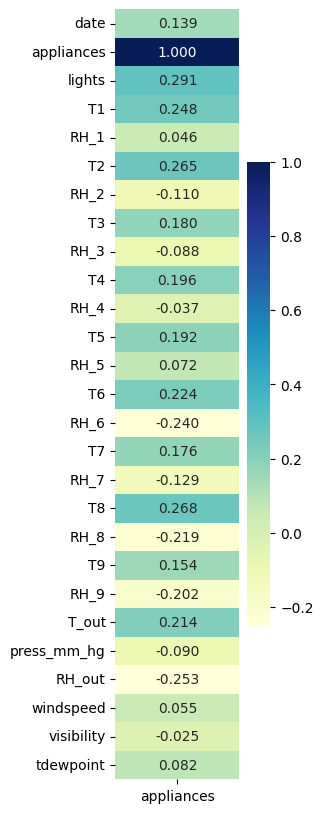

In [35]:
plt.figure(figsize=(2,10))
sns.heatmap(corr_matrix[['appliances']], annot=True, cmap="YlGnBu", fmt=".3f")
plt.show

Для построения модели простой регрессии используем стобец "lights", так как он имеет наибольшее значение корреляции

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt

In [37]:
simple_lr = LinearRegression().fit(X_train[['lights']], y_train )
y_pred_simple_lr = simple_lr.predict(X_test[['lights']])

In [38]:
metrics("Simple SLR", y_test, y_pred_simple_lr)

Simple SLR
MAE: 21.02599020682182
MSE: 742.7022549543356
RMSE: 27.25256419044519
MAPE: 0.36179140351992756
R^2: 0.08399720868662663


<Axes: xlabel='appliances', ylabel='Density'>

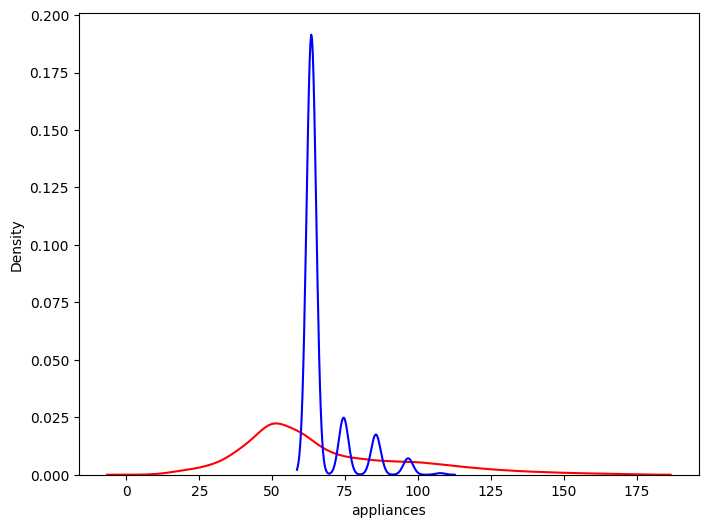

In [39]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_simple_lr, hist=False, color='Blue', ax=ax1)

### Регуляризация

In [40]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [41]:
parameters = {'alpha': np.arange(0, 1, 0.1)}

In [42]:
optimal = GridSearchCV(Ridge(), parameters).fit(X_train[['T8']], y_train)
rid_best = optimal.best_params_['alpha']

In [43]:
parameters = {'alpha': np.arange(0.1, 1, 0.1)}

In [44]:
optimal = GridSearchCV(Lasso(), parameters).fit(X_train[['T8']], y_train)
lasso_best = optimal.best_params_['alpha']

In [45]:
base_elastic_model = ElasticNet(max_iter=100000)
param_grid = {'alpha':[0.1,0.25, 0.5, 0.75, 1, 2, 5, 10, 25, 50, 75, 100],'l1_ratio':[0.1, 0.25, 0.5, 0.75, 0.99, 1]}

In [46]:
grid_model = GridSearchCV(base_elastic_model, param_grid=param_grid,scoring = 'neg_mean_squared_error')
grid_model.fit(X_train[['lights']], y_train)
elnet_best_alpha = grid_model.best_params_['alpha']
elnet_best_ratio = grid_model.best_params_['l1_ratio']

### Ridge

In [47]:
simple_ridge = Ridge(alpha=rid_best).fit(X_train[['lights']], y_train)
y_pred_simple_rid = simple_ridge.predict(X_test[['lights']])

In [48]:
metrics("Ridge SLR", y_test, y_pred_simple_rid)

Ridge SLR
MAE: 21.02599112732019
MSE: 742.702251223519
RMSE: 27.252564121996283
MAPE: 0.3617914251349889
R^2: 0.08399721328798382


<Axes: xlabel='appliances', ylabel='Density'>

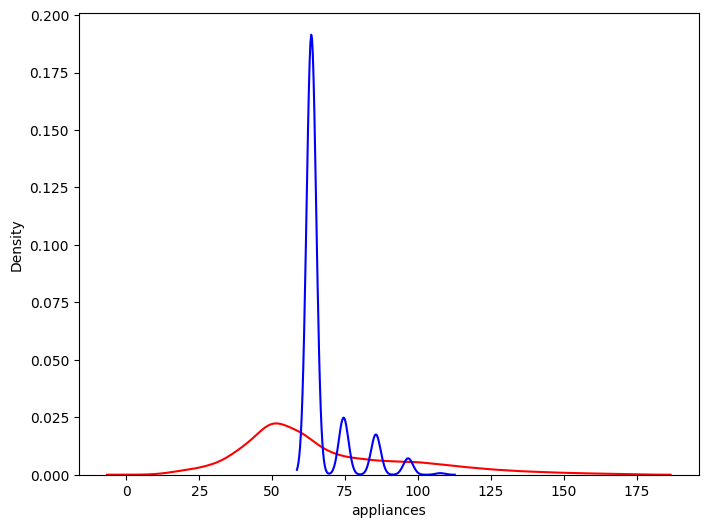

In [49]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_simple_rid, hist=False, color='Blue', ax=ax1)

### Lasso

In [50]:
simple_lasso = Lasso(alpha=lasso_best).fit(X_train[['lights']], y_train)
y_pred_simple_lasso = simple_lasso.predict(X_test[['lights']])

In [51]:
metrics("Lasso SLR", y_test, y_pred_simple_lasso)

Lasso SLR
MAE: 21.027291407304784
MSE: 742.697165177162
RMSE: 27.25247080866544
MAPE: 0.36182195819461044
R^2: 0.08400348610138741


<Axes: xlabel='appliances', ylabel='Density'>

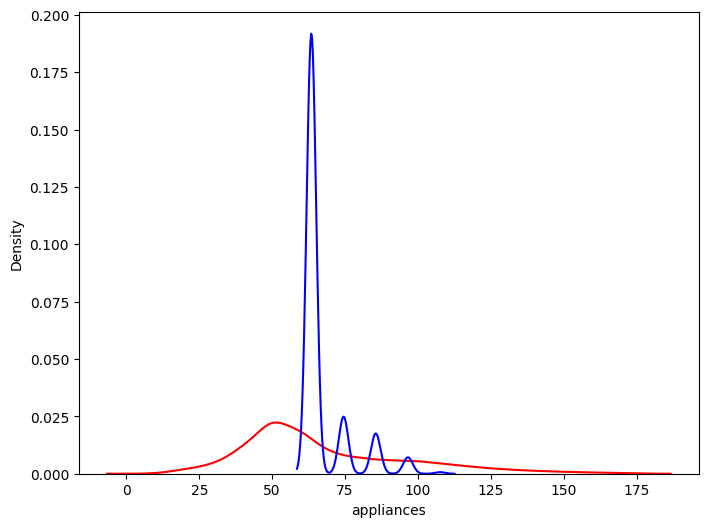

In [52]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_simple_lasso, hist=False, color='Blue', ax=ax1)

### ElasticNet

In [53]:
simple_elnet = ElasticNet(alpha=elnet_best_alpha, l1_ratio=elnet_best_ratio).fit(X_train[['lights']], y_train)
y_pred_simple_elnet = simple_elnet.predict(X_test[['lights']])

In [54]:
metrics("ElasticNet SLR", y_test, y_pred_simple_elnet)

ElasticNet SLR
MAE: 21.027413836811412
MSE: 742.6967052407351
RMSE: 27.25246237022877
MAPE: 0.3618248330734593
R^2: 0.08400405335838446


<Axes: xlabel='appliances', ylabel='Density'>

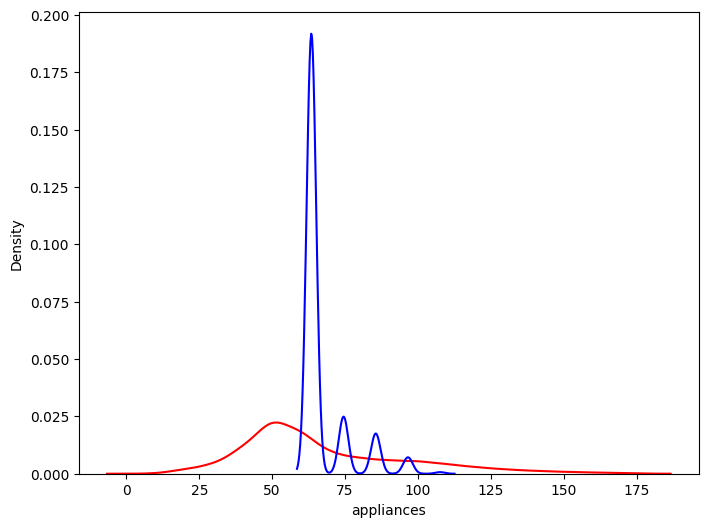

In [55]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_simple_elnet, hist=False, color='Blue', ax=ax1)

### Заключение

Модели простой линейной регрессии довольно неплохло справляются с предсказанием данных. Если смотреть по метриками, то можно сказать, что независимо от наличия или вида регуляризации данные получаются одни и те же, а значит отобрать лучшую довольно сложно.

## Масштабирование

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

In [58]:
scaler.fit(X_train)

StandardScaler()

In [59]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Множественная линейная регрессия

In [60]:
lr = LinearRegression().fit(X_train, y_train)

In [61]:
y_pred = lr.predict(X_test)

In [62]:
metrics("Simple MLR", y_test, y_pred)

Simple MLR
MAE: 17.021645109046148
MSE: 533.381481230587
RMSE: 23.095053176613103
MAPE: 0.2860694373057168
R^2: 0.34216043861059864


<Axes: xlabel='appliances', ylabel='Density'>

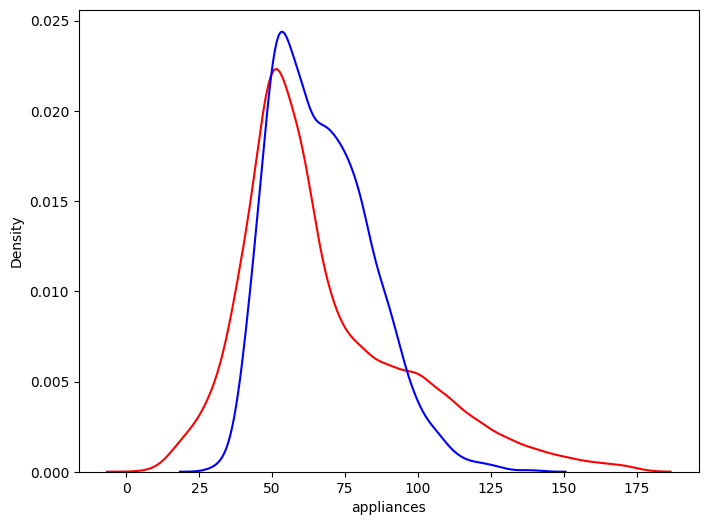

In [63]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred, hist=False, color='Blue', ax=ax1)

### Регулярицзация

Выполним поиск по сетке

In [64]:
parameters = {'alpha': np.arange(0, 1, 0.1)}

In [65]:
optimal = GridSearchCV(Ridge(), parameters).fit(X_train, y_train)
rid_best = optimal.best_params_['alpha']

In [66]:
parameters = {'alpha': np.arange(0, 1, 0.1)}

In [67]:
optimal = GridSearchCV(Lasso(), parameters).fit(X_train, y_train)
lasso_best = optimal.best_params_['alpha']

In [68]:
base_elastic_model = ElasticNet(max_iter=100000)
param_grid = {'alpha':[0.1,0.25, 0.5, 0.75, 1, 2, 5, 10, 25, 50, 75, 100],'l1_ratio':[0.1, 0.25, 0.5, 0.75, 0.99, 1]}

In [69]:
grid_model = GridSearchCV(base_elastic_model, param_grid=param_grid,scoring = 'neg_mean_squared_error')
grid_model.fit(X_train, y_train)
elnet_best_alpha = grid_model.best_params_['alpha']
elnet_best_ratio = grid_model.best_params_['l1_ratio']

### Ridge

In [70]:
ridge = Ridge(alpha=rid_best).fit(X_train, y_train)
y_pred_rid = ridge.predict(X_test)

In [71]:
metrics("Ridge MLR", y_test, y_pred_rid)

Ridge MLR
MAE: 17.02172047251427
MSE: 533.3736608201017
RMSE: 23.094883866781007
MAPE: 0.2860738107015613
R^2: 0.3421700838187369


<Axes: xlabel='appliances', ylabel='Density'>

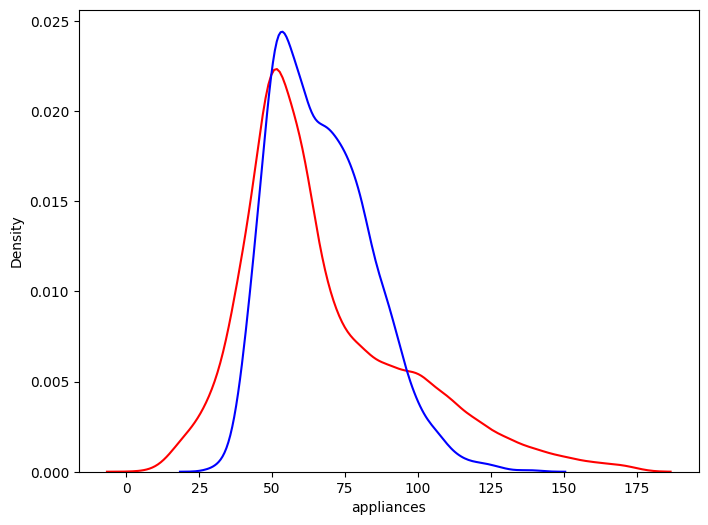

In [72]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_rid, hist=False, color='Blue', ax=ax1)

### Lasso

In [73]:
lasso = Lasso(alpha=lasso_best).fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [74]:
metrics("Lasso MLR", y_test, y_pred_lasso)

Lasso MLR
MAE: 17.021645690702808
MSE: 533.3814944997439
RMSE: 23.095053463885808
MAPE: 0.2860694466927749
R^2: 0.34216042224524545


<Axes: xlabel='appliances', ylabel='Density'>

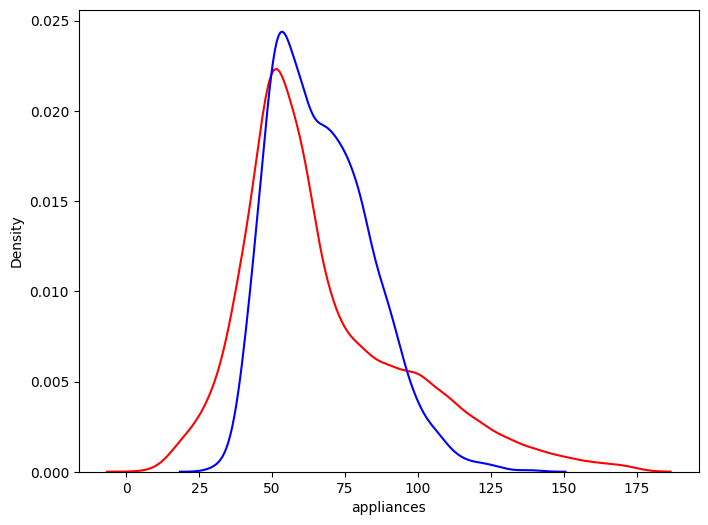

In [75]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_lasso, hist=False, color='Blue', ax=ax1)

### ElasticNet

In [76]:
elnet = ElasticNet(alpha=elnet_best_alpha, l1_ratio=elnet_best_ratio).fit(X_train, y_train)
y_pred_elnet = elnet.predict(X_test)

In [77]:
metrics("ElasticNet MLR", y_test, y_pred_elnet)

ElasticNet MLR
MAE: 17.09727316164755
MSE: 535.8250087528723
RMSE: 23.14789426174382
MAPE: 0.28778754115125194
R^2: 0.33914674366604514


<Axes: xlabel='appliances', ylabel='Density'>

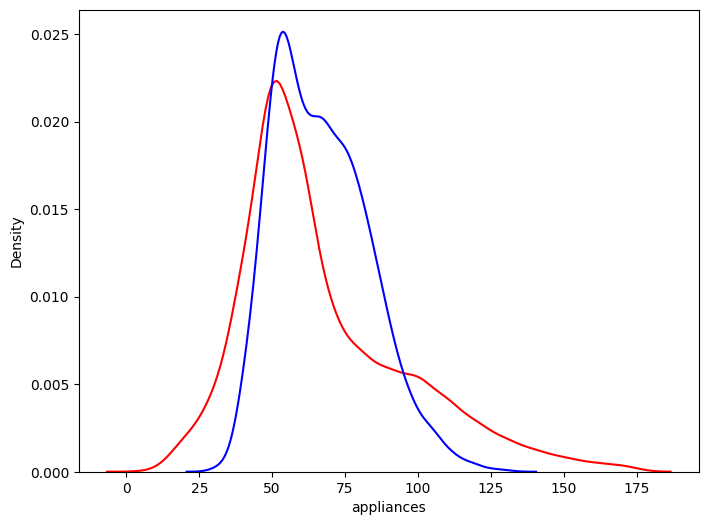

In [78]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_elnet, hist=False, color='Blue', ax=ax1)

### Заключение

Множественная линейная регрессия проявила себя чуть лучше, чем простая линейная регрессия. Здесь ситуация схожа, все модели, независмио от типа регуляризации, схожи между собой.

## Полиномиальная регрессия с использованием пайплайна

In [79]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [80]:
Input = [('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model', LinearRegression()) ]

In [81]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [82]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [83]:
y_pred_pol = pipe.predict(X_test)

In [84]:
metrics("Simple PR", y_test, y_pred_pol)

Simple PR
MAE: 14.480645162846145
MSE: 403.189675957984
RMSE: 20.07958356037256
MAPE: 0.24537275047740223
R^2: 0.502730917884509


<Axes: xlabel='appliances', ylabel='Density'>

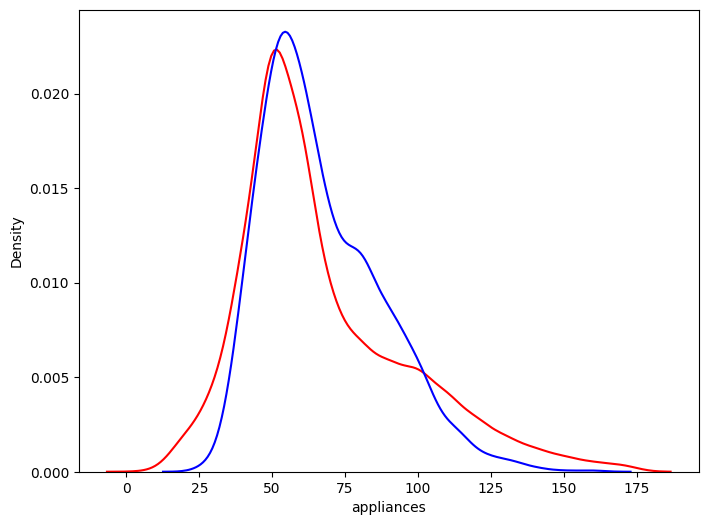

In [85]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_pol, hist=False, color='Blue', ax=ax1)

### Регуляризация

In [86]:
Input = [('polynomial', PolynomialFeatures(include_bias=False)), ('model', Ridge())]
pipe_r = Pipeline(Input)

parameters_r = {'model__alpha': np.arange(0, 1, 0.1), 'polynomial__degree': np.arange(2, 4, 1)}

ridge_optimal = GridSearchCV(pipe_r, parameters_r).fit(X_train, y_train)
ridge_optimal.best_params_

alpha_rid = ridge_optimal.best_params_['model__alpha']
degree_rid = ridge_optimal.best_params_['polynomial__degree']

In [87]:
Input = [('polynomial', PolynomialFeatures(include_bias=False)), ('model', Lasso())]
pipe_l = Pipeline(Input)

parameters_l = {'model__alpha': np.arange(0.01, 1, 0.1), 'polynomial__degree': [2]}

lasso_optimal = RandomizedSearchCV(pipe_l, parameters_l).fit(X_train, y_train)
lasso_optimal.best_params_

alpha_lasso = lasso_optimal.best_params_['model__alpha']
degree_lasso = lasso_optimal.best_params_['polynomial__degree']

In [88]:
Input = [('polynomial', PolynomialFeatures(include_bias=False)), ('model', ElasticNet())]
pipe_elnet = Pipeline(Input)

parameters_elnet = {'model__alpha':[0.1, 0.5, 1, 2, 10, 50, 100],'model__l1_ratio':[0.1, 0.25, 0.5, 0.75, 0.99, 1], 'polynomial__degree': [2]}
elnet_optimal = RandomizedSearchCV(pipe_elnet, parameters_elnet, scoring = 'neg_mean_squared_error').fit(X_train, y_train)

elnet_optimal.best_params_

alpha_elnet = elnet_optimal.best_params_['model__alpha']
l1_ratio_elnet = elnet_optimal.best_params_['model__l1_ratio']
degree_elnet = elnet_optimal.best_params_['polynomial__degree']

### Ridge

In [89]:
Input = [('polynomial', PolynomialFeatures(degree=degree_rid, include_bias=False)), ('model', Ridge(alpha=alpha_rid))]

In [90]:
pipe_rid = Pipeline(Input)

In [91]:
pipe_rid.fit(X_train, y_train)

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('model', Ridge(alpha=0.9))])

In [92]:
y_pred_pol_rid = pipe_rid.predict(X_test)

In [93]:
metrics("Ridge PR", y_test, y_pred_pol)

Ridge PR
MAE: 14.480645162846145
MSE: 403.189675957984
RMSE: 20.07958356037256
MAPE: 0.24537275047740223
R^2: 0.502730917884509


<Axes: xlabel='appliances', ylabel='Density'>

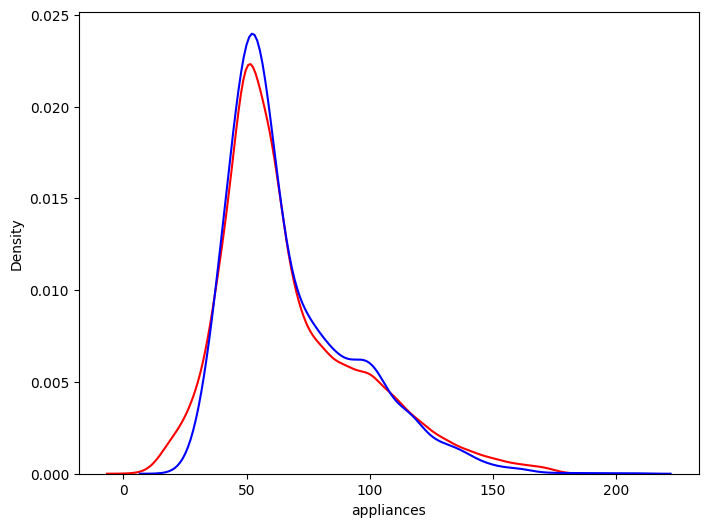

In [94]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_pol_rid, hist=False, color='Blue', ax=ax1)

### Lasso

In [95]:
Input = [('polynomial', PolynomialFeatures(degree=degree_lasso, include_bias=False)), ('model', Lasso(alpha=alpha_lasso))]

In [96]:
pipe_lasso = Pipeline(Input)

In [97]:
pipe_lasso.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', Lasso(alpha=0.01))])

In [98]:
y_pred_pol_lasso = pipe_lasso.predict(X_test)

In [99]:
metrics("Lasso PR", y_test, y_pred_pol_lasso)

Lasso PR
MAE: 14.741322037753385
MSE: 415.7440953855564
RMSE: 20.389803711305227
MAPE: 0.24923518144212434
R^2: 0.48724707740568585


<Axes: xlabel='appliances', ylabel='Density'>

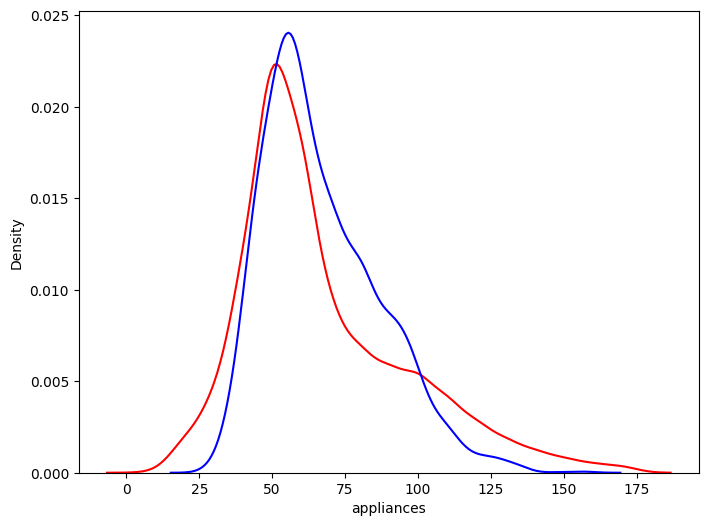

In [100]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_pol_lasso, hist=False, color='Blue', ax=ax1)

### ElasticNet

In [101]:
Input = [('polynomial', PolynomialFeatures(degree=degree_elnet, include_bias=False)), ('model', ElasticNet(alpha=alpha_elnet, l1_ratio=l1_ratio_elnet))]

In [102]:
pipe_elnet = Pipeline(Input)

In [103]:
pipe_elnet.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', ElasticNet(alpha=0.5, l1_ratio=0.99))])

In [104]:
y_pred_pol_elnet = pipe_elnet.predict(X_test)

In [105]:
metrics("ElasticNet PR", y_test, y_pred_pol_elnet)

ElasticNet PR
MAE: 16.782796690470786
MSE: 523.6199601602375
RMSE: 22.882743720110085
MAPE: 0.28296600304787217
R^2: 0.35419969187562916


<Axes: xlabel='appliances', ylabel='Density'>

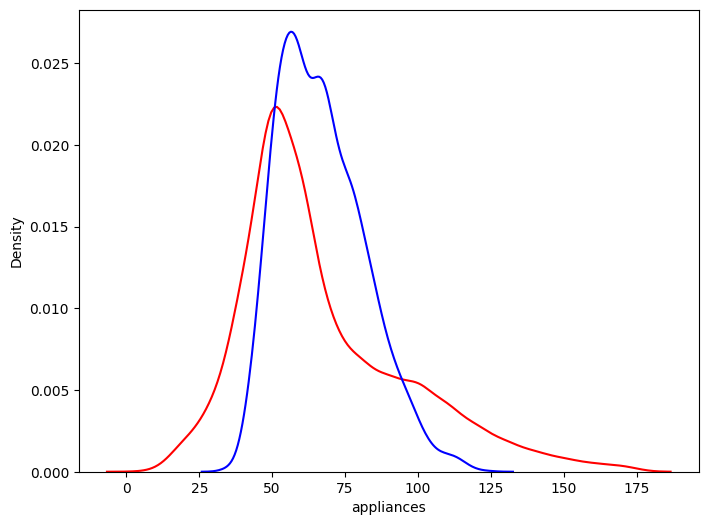

In [106]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_pol_elnet, hist=False, color='Blue', ax=ax1)

### Заключение 

Модели, использующие полиномиальную регрессию получились хуже, чем модели с множественной линейной регрссией. Лучше всего из них проявила себя модель L1 регуляризацией. Это очевидно по всем показателям.

## Заключение

Если выбирать из всех моделей, то лучшим можно назвать модели, построенные на основе множественной линйеной регрессии с использованием регуляризаций, так как их метрики RMSE, MAE можно назвать самыми низкими, а значит лучшими. 

### One-hot кодирование

Переработаем датафрейм следующим образом: столбец "date", разобьём на 2 столбца "Day" и "Month".

In [107]:
df['weekday'] = df['date'].dt.strftime('%A')

In [108]:
df

,date,appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_8,T9,RH_9,T_out,press_mm_hg,RH_out,windspeed,visibility,tdewpoint,weekday
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,48.900000,17.033333,45.530000,6.60,733.50,92.000000,7.000000,63.000000,5.3,Monday
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,48.863333,17.066667,45.560000,6.48,733.60,92.000000,6.666667,59.166667,5.2,Monday
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,48.730000,17.000000,45.500000,6.37,733.70,92.000000,6.333333,55.333333,5.1,Monday
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,48.590000,17.000000,45.400000,6.25,733.80,92.000000,6.000000,51.500000,5.0,Monday
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,48.590000,17.000000,45.400000,6.13,733.90,92.000000,5.666667,47.666667,4.9,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19727,2016-05-27 16:50:00,120,0,25.500000,47.456667,26.000000,42.320000,27.663333,40.693333,24.700000,...,51.500000,23.200000,46.718000,23.00,755.25,55.000000,2.833333,22.166667,13.4,Friday
19728,2016-05-27 17:00:00,110,0,25.600000,47.193333,25.968571,42.528571,27.390000,41.030000,24.700000,...,50.863333,23.200000,46.751429,23.00,755.20,55.000000,3.000000,22.000000,13.4,Friday
19729,2016-05-27 17:10:00,90,0,25.533333,46.860000,25.978000,42.534000,27.323333,41.090000,24.700000,...,50.445000,23.200000,46.745000,22.90,755.20,55.333333,3.166667,22.833333,13.4,Friday
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,50.074000,23.200000,46.790000,22.70,755.20,55.666667,3.333333,23.666667,13.3,Friday


In [109]:
X_hot = pd.get_dummies(df, columns=['weekday'], drop_first= True, dtype = int)

In [110]:
y = df["appliances"]
X_hot = X_hot.drop(["appliances"], axis=1)

In [111]:
X_hot = X_hot.drop(["date"], axis=1)

In [112]:
X_train_hot, X_test_hot, y_train, y_test = train_test_split(X_hot, y, test_size=0.2, stratify = y)

In [113]:
X_train_hot

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_out,windspeed,visibility,tdewpoint,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
18981,0,24.426667,52.863333,23.463333,53.200000,27.963333,46.496667,23.790000,49.590000,22.700000,...,91.000000,4.000000,29.000000,14.5000,0,0,1,0,0,0
10978,0,22.133333,38.290000,19.700000,41.000000,22.890000,38.126667,20.500000,39.626667,20.075000,...,77.333333,6.333333,40.000000,4.5700,0,0,1,0,0,0
13702,0,22.890000,43.290000,21.125000,44.397500,24.290000,39.030000,22.280000,40.775000,21.600000,...,76.000000,4.000000,32.666667,8.3700,0,0,0,0,0,0
4456,10,21.100000,42.590000,20.600000,41.500000,20.500000,41.730000,20.200000,42.290000,19.033333,...,85.666667,2.666667,40.000000,3.2700,0,0,0,1,0,0
14812,0,22.500000,37.117500,21.890000,34.933333,25.133333,35.530000,22.500000,34.466667,20.700000,...,56.000000,4.333333,40.000000,0.6330,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,0,23.000000,39.400000,22.000000,39.090000,21.290000,43.590000,18.323333,43.060000,18.390000,...,84.500000,10.166667,24.666667,0.0333,0,0,0,0,0,0
1785,0,18.463333,42.290000,17.760000,41.730000,18.390000,43.590000,15.800000,46.700000,15.390000,...,92.000000,4.000000,23.000000,4.1500,0,0,1,0,0,0
15981,0,22.200000,37.366667,21.730000,31.500000,22.500000,34.290000,21.290000,34.612000,19.600000,...,42.000000,4.500000,40.000000,0.6500,0,0,1,0,0,0
17745,0,25.500000,39.500000,23.790000,40.090000,25.812000,34.054000,25.370000,39.900000,24.000000,...,79.500000,7.000000,23.500000,8.2000,0,0,0,0,0,0


## Простая линейная регрессия

In [114]:
simple_lr_hot = LinearRegression().fit(X_train_hot[['weekday_Wednesday']], y_train )
y_pred_simple_lr_hot = simple_lr_hot.predict(X_test_hot[['weekday_Wednesday']])

In [115]:
metrics("Simple SLR", y_test, y_pred_simple_lr_hot)

Simple SLR
MAE: 22.35375534381911
MSE: 809.1584916895464
RMSE: 28.445711305740737
MAPE: 0.38654979910487247
R^2: 0.002034217536992622


<Axes: xlabel='appliances', ylabel='Density'>

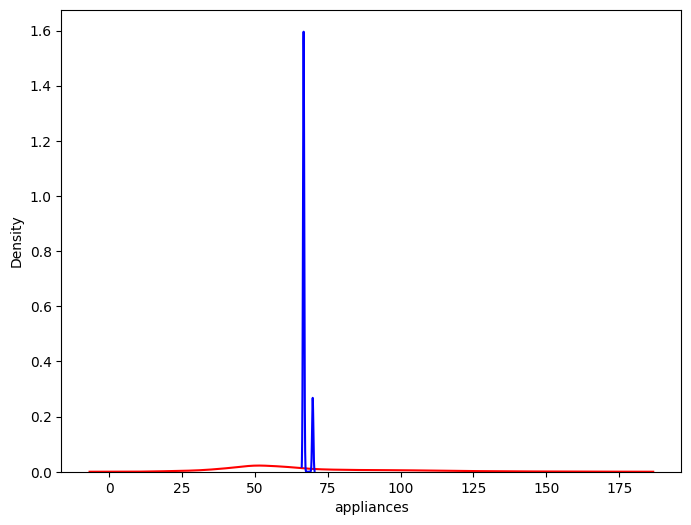

In [116]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_simple_lr_hot, hist=False, color='Blue', ax=ax1)

In [117]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [118]:
parameters = {'alpha': np.arange(0, 1, 0.1)}

In [119]:
optimal = GridSearchCV(Ridge(), parameters).fit(X_train_hot[['weekday_Wednesday']], y_train)
rid_best = optimal.best_params_['alpha']

In [120]:
parameters = {'alpha': np.arange(0.1, 1, 0.1)}

In [121]:
optimal = GridSearchCV(Lasso(), parameters).fit(X_train_hot[['weekday_Wednesday']], y_train)
lasso_best = optimal.best_params_['alpha']

In [122]:
base_elastic_model = ElasticNet(max_iter=100000)
param_grid = {'alpha':[0.1,0.25, 0.5, 0.75, 1, 2, 5, 10, 25, 50, 75, 100],'l1_ratio':[0.1, 0.25, 0.5, 0.75, 0.99, 1]}

In [123]:
grid_model = GridSearchCV(base_elastic_model, param_grid=param_grid,scoring = 'neg_mean_squared_error')
grid_model.fit(X_train_hot[['weekday_Wednesday']], y_train)
elnet_best_alpha = grid_model.best_params_['alpha']
elnet_best_ratio = grid_model.best_params_['l1_ratio']

### Ridge

In [124]:
simple_ridge_hot = Ridge(alpha=rid_best).fit(X_train_hot[['weekday_Wednesday']], y_train)
y_pred_simple_rid_hot = simple_ridge_hot.predict(X_test_hot[['weekday_Wednesday']])

In [125]:
metrics("Ridge SLR", y_test, y_pred_simple_rid_hot)

Ridge SLR
MAE: 22.35379523909486
MSE: 809.1587138999168
RMSE: 28.445715211608178
MAPE: 0.38655059791097
R^2: 0.0020339434765354047


<Axes: xlabel='appliances', ylabel='Density'>

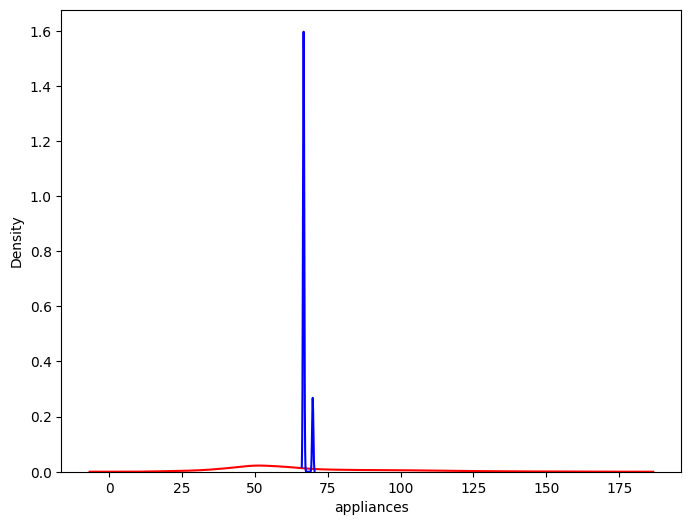

In [126]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_simple_rid_hot, hist=False, color='Blue', ax=ax1)

### Lasso

In [127]:
simple_lasso_hot = Lasso(alpha=lasso_best).fit(X_train_hot[['weekday_Wednesday']], y_train)
y_pred_simple_lasso_hot = simple_lasso_hot.predict(X_test_hot[['weekday_Wednesday']])

In [128]:
metrics("Lasso SLR", y_test, y_pred_simple_lasso_hot)

Lasso SLR
MAE: 22.37373916039161
MSE: 809.3434805510076
RMSE: 28.448962732426775
MAPE: 0.3869499265442696
R^2: 0.001806063775064537


<Axes: xlabel='appliances', ylabel='Density'>

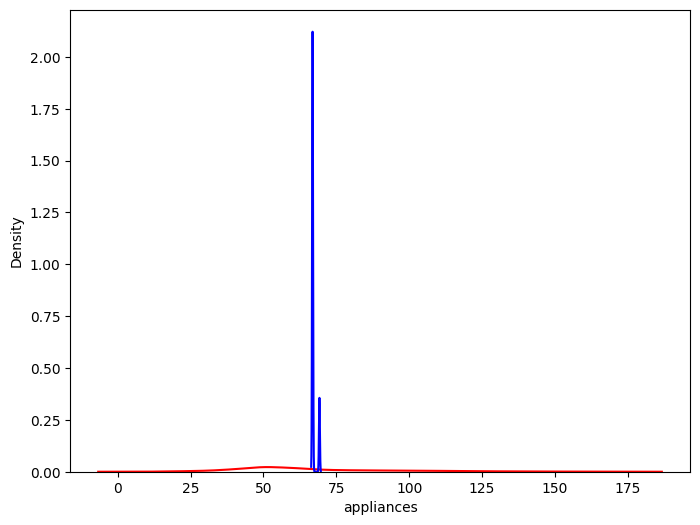

In [129]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_simple_lasso_hot, hist=False, color='Blue', ax=ax1)

### ElasticNet

In [130]:
simple_elnet_hot = ElasticNet(alpha=elnet_best_alpha, l1_ratio=elnet_best_ratio).fit(X_train_hot[['weekday_Wednesday']], y_train)
y_pred_simple_elnet_hot = simple_elnet_hot.predict(X_test_hot[['weekday_Wednesday']])

In [131]:
metrics("ElasticNet SLR", y_test, y_pred_simple_elnet_hot)

ElasticNet SLR
MAE: 22.37373916039161
MSE: 809.3434805510076
RMSE: 28.448962732426775
MAPE: 0.3869499265442696
R^2: 0.001806063775064537


<Axes: xlabel='appliances', ylabel='Density'>

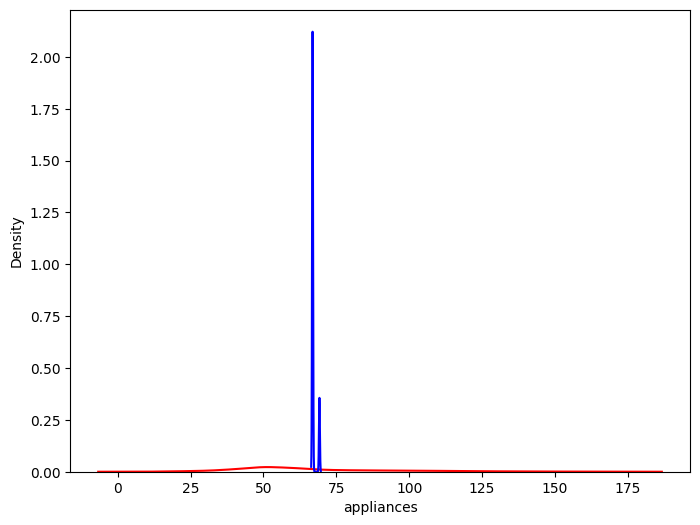

In [132]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_simple_elnet_hot, hist=False, color='Blue', ax=ax1)

### Заключение

Модели, построенные на основе значений столбца 'weekday_Wednesday', проявили себя неплохо. Лучше всего себя показали модель без регуляризации и модель с L2 регуляризацией.

## Множественная линейная регрессия

In [133]:
lr_hot = LinearRegression().fit(X_train_hot, y_train)

In [134]:
y_pred_hot = lr_hot.predict(X_test_hot)

In [135]:
metrics("Simple MLR", y_test, y_pred_hot)

Simple MLR
MAE: 16.828878614335053
MSE: 514.7844448262235
RMSE: 22.68886169084345
MAPE: 0.281808880052107
R^2: 0.36509686723043755


<Axes: xlabel='appliances', ylabel='Density'>

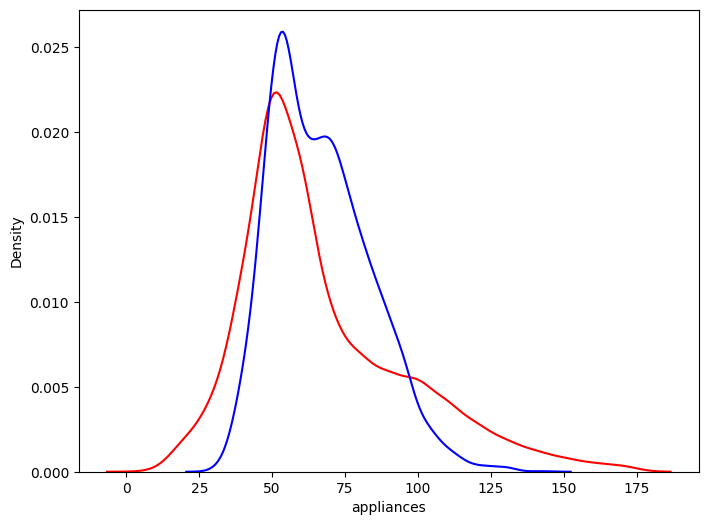

In [136]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_hot, hist=False, color='Blue', ax=ax1)

### Регулярицзация

Выполним поиск по сетке

In [137]:
parameters = {'alpha': np.arange(0, 1, 0.1)}

In [138]:
optimal = GridSearchCV(Ridge(), parameters).fit(X_train_hot, y_train)
rid_best = optimal.best_params_['alpha']

In [139]:
parameters = {'alpha': np.arange(0, 1, 0.1)}

In [140]:
optimal = GridSearchCV(Lasso(), parameters).fit(X_train_hot, y_train)
lasso_best = optimal.best_params_['alpha']

In [141]:
base_elastic_model = ElasticNet(max_iter=100000)
param_grid = {'alpha':[0.1,0.25, 0.5, 0.75, 1, 2, 5, 10, 25, 50, 75, 100],'l1_ratio':[0.1, 0.25, 0.5, 0.75, 0.99, 1]}

In [142]:
grid_model = GridSearchCV(base_elastic_model, param_grid=param_grid,scoring = 'neg_mean_squared_error')
grid_model.fit(X_train_hot, y_train)
elnet_best_alpha = grid_model.best_params_['alpha']
elnet_best_ratio = grid_model.best_params_['l1_ratio']

### Ridge

In [143]:
ridge_hot = Ridge(alpha=rid_best).fit(X_train_hot, y_train)
y_pred_rid_hot = ridge_hot.predict(X_test_hot)

In [144]:
metrics("Ridge MLR", y_test, y_pred_rid_hot)

Ridge MLR
MAE: 16.828867188157446
MSE: 514.7830632294259
RMSE: 22.688831244236138
MAPE: 0.28180978634229137
R^2: 0.36509857120604094


<Axes: xlabel='appliances', ylabel='Density'>

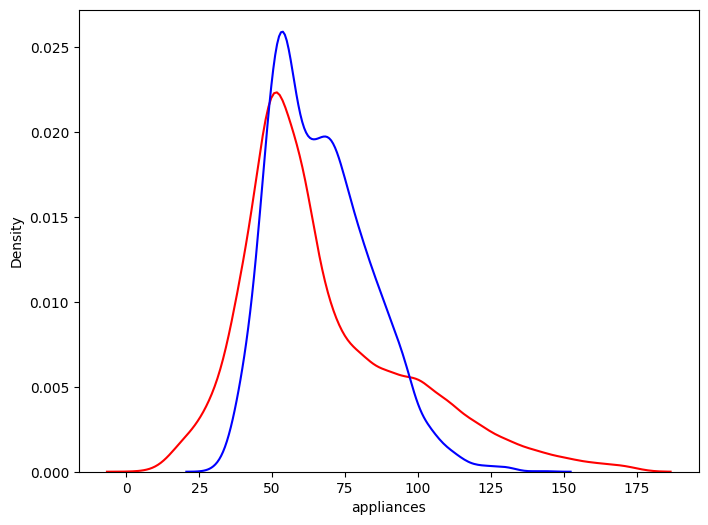

In [145]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_rid_hot, hist=False, color='Blue', ax=ax1)

### Lasso

In [146]:
lasso_hot = Lasso(alpha=lasso_best).fit(X_train_hot, y_train)
y_pred_lasso_hot = lasso_hot.predict(X_test_hot)

In [147]:
metrics("Lasso MLR", y_test, y_pred_lasso_hot)

Lasso MLR
MAE: 16.828879063775652
MSE: 514.7843811601315
RMSE: 22.688860287818148
MAPE: 0.2818088848552679
R^2: 0.3650969457522377


<Axes: xlabel='appliances', ylabel='Density'>

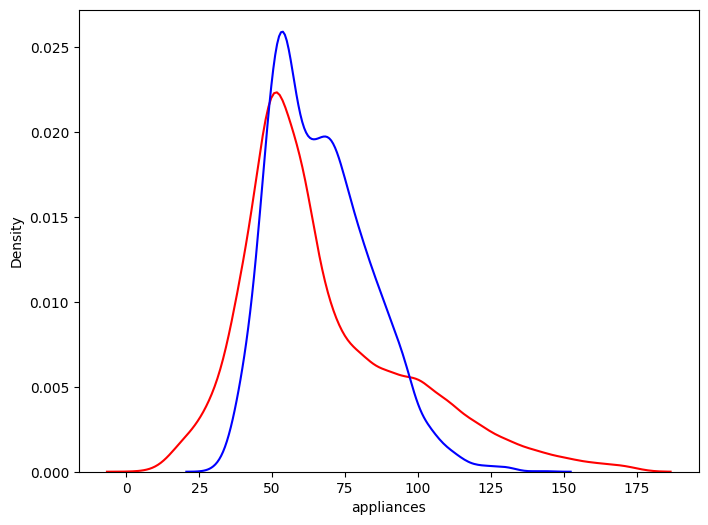

In [148]:
plt.figure(figsize=(8,6))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_lasso_hot, hist=False, color='Blue', ax=ax1)

### ElasticNet

In [149]:
elnet_hot = ElasticNet(alpha=elnet_best_alpha, l1_ratio=elnet_best_ratio).fit(X_train_hot, y_train)
y_pred_elnet_hot = elnet_hot.predict(X_test_hot)

In [150]:
metrics("ElasticNet MLR", y_test, y_pred_elnet_hot)

ElasticNet MLR
MAE: 16.853029548594257
MSE: 515.3624559450848
RMSE: 22.701595889828642
MAPE: 0.28273021393910935
R^2: 0.3643839842483876


<Axes: xlabel='appliances', ylabel='Density'>

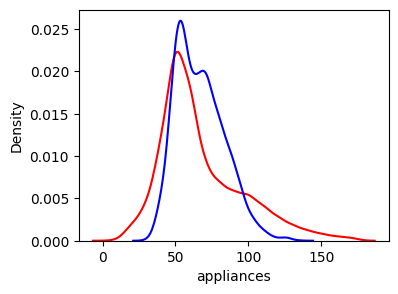

In [151]:
plt.figure(figsize=(4,3))
ax1 =  sns.distplot(y_test, hist=False, color='Red')
sns.distplot(y_pred_elnet_hot, hist=False, color='Blue', ax=ax1)

### Заключение

В данном случае неплохо проявили себя модели с L2 регуляризацией и модель без регуляризации. Небольшие отличия они имеют в различных метриках, а, значит, каждая из моделей чуть лучше объясняет различные значения.

# Демонстрация собственных метрик

In [152]:
import sys
sys.path.append("..")
from models.metrics import mMAE, mMSE, mRMSE, mMAPE, mR2

Работа метрик будет продемнострирована на данных, полученных в предыдущем пункте

#### Написанные мной метрики

In [153]:
print(f'MAE: {mMAE(y_test, y_pred_elnet_hot)}')
print(f'MSE: {mMSE(y_test, y_pred_elnet_hot)}')
print(f'RMSE: {mRMSE(y_test, y_pred_elnet_hot)}')
print(f'MAPE: {mMAPE(y_test, y_pred_elnet_hot)}')
print(f'R^2: {mR2(y_test,y_pred_elnet_hot)}')

MAE: 16.853029548594257
MSE: 515.3624559450848
RMSE: 22.701595889828642
MAPE: 0.28273021393910935
R^2: 0.3643839842483876


#### Метрики библиотеки sklearn

In [154]:
print(f'MAE: {mean_absolute_error(y_test, y_pred_elnet_hot)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_elnet_hot)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_elnet_hot))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred_elnet_hot)}')
print(f'R^2: {r2_score(y_test, y_pred_elnet_hot)}')

MAE: 16.853029548594257
MSE: 515.3624559450848
RMSE: 22.701595889828642
MAPE: 0.28273021393910935
R^2: 0.3643839842483876
